In [102]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
import PIL

from IPython.display import clear_output, display, Image
from ipywidgets import Video

import glob
import io
import os
import time

# Stage 2 - Getting the Data

In [3]:
real_folder = "../VidTIMIT"
fake_folder = "../DeepfakeTIMIT"

In [4]:
real_videos = glob.glob(real_folder + "/**/*.avi", recursive=True)
real_videos

['../VidTIMIT/mrjo0/sx104.avi',
 '../VidTIMIT/mrjo0/si734.avi',
 '../VidTIMIT/mrjo0/sx14.avi',
 '../VidTIMIT/mrjo0/sa2.avi',
 '../VidTIMIT/mrjo0/sa1.avi',
 '../VidTIMIT/mrjo0/sx374.avi',
 '../VidTIMIT/mrjo0/si1624.avi',
 '../VidTIMIT/mrjo0/si1364.avi',
 '../VidTIMIT/mrjo0/sx194.avi',
 '../VidTIMIT/mrjo0/sx284.avi',
 '../VidTIMIT/mrcz0/sx11.avi',
 '../VidTIMIT/mrcz0/si911.avi',
 '../VidTIMIT/mrcz0/si2171.avi',
 '../VidTIMIT/mrcz0/sx101.avi',
 '../VidTIMIT/mrcz0/sx371.avi',
 '../VidTIMIT/mrcz0/si1541.avi',
 '../VidTIMIT/mrcz0/sa2.avi',
 '../VidTIMIT/mrcz0/sa1.avi',
 '../VidTIMIT/mrcz0/sx191.avi',
 '../VidTIMIT/mrcz0/sx281.avi',
 '../VidTIMIT/mtmr0/sx313.avi',
 '../VidTIMIT/mtmr0/sx403.avi',
 '../VidTIMIT/mtmr0/sa2.avi',
 '../VidTIMIT/mtmr0/sa1.avi',
 '../VidTIMIT/mtmr0/sx43.avi',
 '../VidTIMIT/mtmr0/sx223.avi',
 '../VidTIMIT/mtmr0/si673.avi',
 '../VidTIMIT/mtmr0/sx133.avi',
 '../VidTIMIT/mtmr0/si1933.avi',
 '../VidTIMIT/mtmr0/si1303.avi',
 '../VidTIMIT/faks0/sx313.avi',
 '../VidTIMIT/fak

In [5]:
fake_videos = glob.glob(fake_folder + "/**/*.avi", recursive=True)
fake_videos

['../DeepfakeTIMIT/higher_quality/mrjo0/sx374-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/sx284-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/sx194-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/sa1-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/si1364-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/si1624-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/si734-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/sa2-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/sx104-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrjo0/sx14-video-mstk0.avi',
 '../DeepfakeTIMIT/higher_quality/mrcz0/si911-video-mdbb0.avi',
 '../DeepfakeTIMIT/higher_quality/mrcz0/sa2-video-mdbb0.avi',
 '../DeepfakeTIMIT/higher_quality/mrcz0/si2171-video-mdbb0.avi',
 '../DeepfakeTIMIT/higher_quality/mrcz0/sx281-video-mdbb0.avi',
 '../DeepfakeTIMIT/higher_quality/mrcz0/sx371-video-mdbb0.avi',
 '../DeepfakeTIMIT/higher_quality/mrcz0/sx19

Don't use this approach in jupyter notebook on Mac, creates a window which cannot be killed. In effect broken with no planned fix. You'll need to restart the notebook kernel to address the issue.

```Python
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(real_videos[0])

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:

        # Display the resulting frame
        cv2.imshow('Frame', frame)

        # Press ESC on keyboard to  exit
        k = cv2.waitKey(0) & 0xFF
        if k == ord('q'):
            print("Quitting...")
            break

        
    # Break the loop
    else:
        print("Exiting...")
        break

# When everything done, release the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()
```

In [79]:
#Use 'jpeg' instead of 'png' (~5 times faster)
def showarray(a, fmt='jpeg'):
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

This is a better approach to the above but has a degree of jumping with clear_output

```python
# This approach does work compared to above, but very jumpy because of clear_output.

cam = cv2.VideoCapture(0)
try:
    while(True):
        t1 = time.time()
        # Capture frame-by-frame
        ret, frame = cam.read()
        if not ret:
            # Release the Video Device if ret is false
            cam.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)        
        showarray(frame)
        t2 = time.time()
        print("%f FPS" % (1/(t2-t1)))
        
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    cam.release()
    print("Stream stopped")
```

In [14]:
def show_video(path):
    vid = cv2.VideoCapture(path)
    try:
        while(True):
            t1 = time.time()
            # Capture frame-by-frame
            ret, frame = vid.read()
            if not ret:
                # Release the Video Device if ret is false
                vid.release()
                # Message to be displayed after releasing the device
                print("Released Video Resource")
                break

            # Convert the image from OpenCV BGR format to matplotlib RGB format
            # to display the image
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)        
            showarray(frame)
            t2 = time.time()
            print("%f FPS" % (1/(t2-t1)))

            # Display the frame until new frame is available
            clear_output(wait=True)
    except KeyboardInterrupt:
        vid.release()
        print("Stream stopped")

In [24]:
show_video(fake_videos[0])

Released Video Resource


In [74]:
def convert_video(path, outpath):
    if os.path.exists(outpath):
        print("Error: outpath exists can't write file.")
        return False
    vid = cv2.VideoCapture(path)
    fourcc = cv2.VideoWriter_fourcc(*"H264")
    width= int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
    height= int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(vid.get(cv2.CAP_PROP_FPS))
    out = cv2.VideoWriter(outpath, fourcc, fps, (width,height))
    
    while(True):
        ret, frame = vid.read()
        if not ret:
            break
        out.write(frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
    
    vid.release()
    out.release()
    return True


The improved approach is to use the video widget to display the videos. However they are limited to using MP4 (h.264) to display. Display a video and the matching fake. The AVI files can't be displayed as videos so they need to be converted to MP4.

In [85]:
temp_path = '__tempa.mp4'
# Delete the original file before trying to write again as it won't work. Must be a new file.
if os.path.exists(temp_path):
    os.remove(temp_path)
    
convert_video(real_videos[5], temp_path)
video = Video.from_file(temp_path, controls=True) # AVI not supported
#video

In [84]:
temp_path2 = '__tempb.mp4'
if os.path.exists(temp_path2):
    os.remove(temp_path2)
convert_video(fake_videos[0], temp_path2)
video2 = Video.from_file(temp_path2, controls=True) # AVI not supported
# video2

In [151]:
# Display videos next to each other
from ipywidgets import HBox
HBox([video,video2])

In [94]:
# Save frames from a video as jpeg
# TODO: Add a skip to this so you can create a file every n frames
def save_frames(path, target_path):
    i = 1
    vid = cv2.VideoCapture(path)
    while(True):
        ret, frame = vid.read()
        if not ret:
            break
        cv2.imwrite("{}frame-{:08d}.jpg".format(target_path,i), frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break
        i += 1
    
    vid.release()
    return True

In [138]:
# Write frames out

import shutil

out_path = "./real/"
if os.path.exists(out_path):
    shutil.rmtree(out_path)
os.mkdir(out_path)
save_frames(real_videos[5], out_path)

out_path2 = "./fake/"
if os.path.exists(out_path2):
    shutil.rmtree(out_path2)
os.mkdir(out_path2)
save_frames(fake_videos[0], out_path2)

True

In [142]:
# define a function that will read and display given images and their difference
def diff_images(img1, img2):
    i1 = cv2.imread(img1)
    i2 = cv2.imread(img2)

    # note that images in OpenCV are in BGR format, 
    # and to plot with matplotlib, we convert them to RGB
    i1 = cv2.cvtColor(i1, cv2.COLOR_BGR2RGB)
    i2 = cv2.cvtColor(i2, cv2.COLOR_BGR2RGB)

    # find the difference between the images
    image_diff = None
    if i1.shape == i2.shape:
        image_diff = i1 - i2

    # show the images side by side
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(i1)
    plt.title('Image 1')
    plt.subplot(1, 3, 2)
    plt.title('Image 2')
    plt.imshow(i2)
    if image_diff is not None:
        plt.subplot(1, 3, 3)
        plt.title('Difference')
        plt.imshow(image_diff)
    plt.show()
    return i1, i2, image_diff

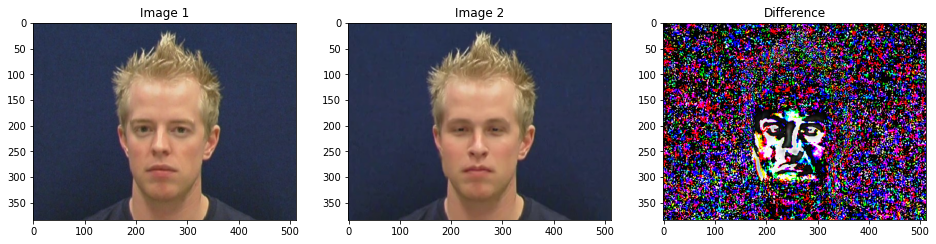

In [104]:
# take one frame from real video and the same one from fake
real_frame = out_path + 'frame-00000001.jpg'
fake_frame = out_path2 + 'frame-00000001.jpg'

real_image, fake_image, image_diff = diff_images(real_frame, fake_frame)

# Stage 3 - Face and Facial Landmarks Detection Using Either dlib or MTCNN

In [123]:
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

In [121]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()

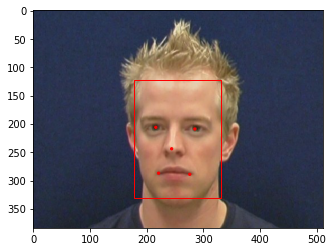

In [124]:
# load image from file
pixels = plt.imread(real_frame)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(real_frame, faces)

In [126]:
# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        plt.imshow(data[y1:y2, x1:x2])
    # show the plot
    plt.show()

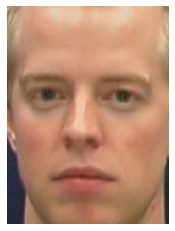

In [127]:
draw_faces(real_frame, faces)

In [146]:
x1, y1, width, height = faces[0]['box']
x2, y2 = x1 + width, y1 + height
out_face = cv2.cvtColor(pixels[y1:y2, x1:x2], cv2.COLOR_BGR2RGB) # Save face and transform colour
cv2.imwrite("test.jpg", out_face)

True

In [147]:
faces

[{'box': [177, 122, 155, 209],
  'confidence': 0.9999860525131226,
  'keypoints': {'left_eye': (216, 206),
   'right_eye': (285, 209),
   'nose': (244, 244),
   'mouth_left': (221, 287),
   'mouth_right': (276, 289)}}]

In [148]:
# mostly empty function at this point
def crop_and_align(image, bbx, left_eye, right_eye):
    return image[bbx[1]:bbx[1]+bbx[3], bbx[0]:bbx[0]+bbx[2], :].copy()


def save_faces(path, target_path):
    i = 1
    vid = cv2.VideoCapture(path)
    while(True):
        ret, frame = vid.read()
        if not ret:
            break
        
        faces = detector.detect_faces(frame)
        #x1, y1, width, height = faces[0]['box']
        #x2, y2 = x1 + width, y1 + height
        face_image = crop_and_align(frame,
                                    faces[0]['box'],
                                    faces[0]['keypoints']['left_eye'],
                                    faces[0]['keypoints']['right_eye'])
        
        cv2.imwrite("{}face-{:08d}.jpg".format(target_path,i), face_image)#frame[y1:y2, x1:x2])
        if cv2.waitKey(1) & 0xFF == 27:
            break
        i += 1
    
    vid.release()
    return True

In [149]:
# Extract faces from videos

out_path = "./real-faces/"
if os.path.exists(out_path):
    shutil.rmtree(out_path)
os.mkdir(out_path)
save_faces(real_videos[5], out_path)

out_path2 = "./fake-faces/"
if os.path.exists(out_path2):
    shutil.rmtree(out_path2)
os.mkdir(out_path2)
save_faces(fake_videos[0], out_path2)

True

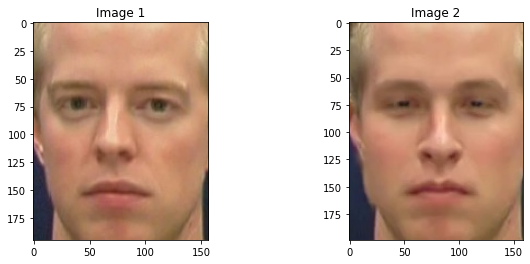

In [150]:
# The diff doesn't quite work as they are not the same size exactly... look to fix...

# take one frame from real video and the same one from fake
real_frame = out_path + 'face-00000001.jpg'
fake_frame = out_path2 + 'face-00000001.jpg'

real_image, fake_image, image_diff = diff_images(real_frame, fake_frame)

# Stage 4 - Crop, Scale, and Align Faces

In [201]:
def midpoint(p1, p2):
    (x1,y1) = p1
    (x2,y2) = p2
    return ((x1+x2) // 2, (y1+y2) // 2)

def draw_eye_line(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        
        (x1, y1) = result['keypoints']['left_eye']
        (x2, y2) = result['keypoints']['right_eye']
        line = plt.Line2D((x1, x2),
                          (y1, y2),
                          color='green')
        ax.add_line(line)
        
        left = Circle(result['keypoints']['left_eye'], radius=2, color='red')
        ax.add_patch(left)
        right = Circle(result['keypoints']['right_eye'], radius=2, color='red')
        ax.add_patch(right)
        center = Circle(midpoint((x1,y1), (x2,y2)), radius=2, color='blue')
        ax.add_patch(center)
        

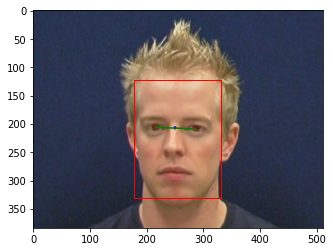

In [202]:
draw_eye_line('./real/frame-00000001.jpg', faces)

In [175]:
left_eye = faces[0]['keypoints']['left_eye']
right_eye = faces[0]['keypoints']['right_eye']
dY = right_eye[1] - left_eye[1]
dX = right_eye[0] - left_eye[0]
angle = np.degrees(np.arctan2(dY, dX)) - 180

(dX, dY, angle)

(69, 3, -177.51044707800085)

In [187]:
def eyes_angle(left_eye, right_eye):
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    angle = np.degrees(np.arctan2(dY, dX))
    
    return angle

In [188]:
left_eye = faces[0]['keypoints']['left_eye']
right_eye = faces[0]['keypoints']['right_eye']

angle = eyes_angle(left_eye, right_eye)
angle

2.489552921999156

In [203]:
def scaling_factor(left_eye, right_eye, desired_left_eye, desired_right_eye):
    # find the distances between X and Y coordinates of both eyes
    dY = right_eye[1] - left_eye[1]
    dX = right_eye[0] - left_eye[0]
    # find the actual distance between eyes (the hypotenuse)
    dist = np.sqrt((dX ** 2) + (dY ** 2))
    # find the distance between X and Y coordinates in the desired face (which we will have after scaling)
    desired_dY = desired_right_eye[1] - desired_left_eye[1]
    desired_dX = desired_right_eye[0] - desired_left_eye[0]
    # find the  distance between desired eye coordinates (the hypotenuse)
    desired_dist = np.sqrt((desired_dX ** 2) + (desired_dY ** 2))
    
    # compute the ratio between distances, which is the scale factor
    scaling_factor = desired_dist / dist
    return scaling_factor

In [222]:
# Target Image Size (Assume square, w==h)
desired_size = 256

# Left eye between 20-40%, so y will be straight so same value, right is 1.0-leftX
desired_left_pc = (0.35, 0.35)
desired_right_pc = (1.0 - desired_left_pc[0], desired_left_pc[1])


desired_left_px = (desired_left_pc[0] * desired_size, desired_left_pc[1] * desired_size)
desired_right_px = (desired_right_pc[0] * desired_size, desired_right_pc[1] * desired_size)

scale = scaling_factor(left_eye, right_eye, desired_left_px, desired_right_px)
scale

1.1119929414734577

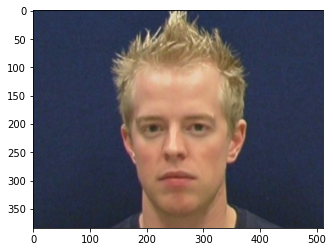

In [227]:
img = cv2.imread('./real/frame-00000001.jpg')
rows,cols,_ = img.shape
center = midpoint(left_eye, right_eye)
M = cv2.getRotationMatrix2D(center, angle, scale)
img_rotated = cv2.warpAffine(img, M, (cols,rows))
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))

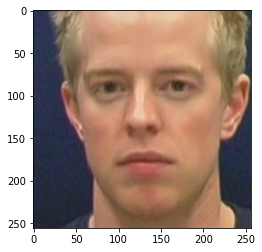

In [226]:
img = cv2.imread('./real/frame-00000001.jpg')
rows,cols,_ = img.shape
center = midpoint(left_eye, right_eye)
M = cv2.getRotationMatrix2D(center, angle, scale)
tX = desired_size * 0.5
tY = desired_left_px[1]
M[0, 2] += (tX - center[0])
M[1, 2] += (tY - center[1])

img_rotated = cv2.warpAffine(img, M, (desired_size,desired_size), flags=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(img_rotated, cv2.COLOR_BGR2RGB))

In [235]:
# New crop_and_align returns rotated image face
def crop_and_align(image, left_eye, right_eye, desired_size, desired_left_pc):
    # Find the angle of the eye alignment
    angle = eyes_angle(left_eye, right_eye)
    
    # Compute the scaling factor to place our eyes at the correct point in the target image
    desired_right_pc = (1.0 - desired_left_pc[0], desired_left_pc[1]) # Place right level same percentage distance from edge
    desired_left_px = (desired_left_pc[0] * desired_size, desired_left_pc[1] * desired_size) # Convert to pixel coord
    desired_right_px = (desired_right_pc[0] * desired_size, desired_right_pc[1] * desired_size) # Convert to pixel coord

    # Turn pixel coord into scaling factor
    scale = scaling_factor(left_eye, right_eye, desired_left_px, desired_right_px)
    
    # Build Rotation Matrix
    center = midpoint(left_eye, right_eye) # Midpoint of the eyes to rotate on.
    M = cv2.getRotationMatrix2D(center, angle, scale)
    
    # Adjust the matrix based on target image size
    tX = desired_size * 0.5
    tY = desired_left_px[1]
    M[0, 2] += (tX - center[0])
    M[1, 2] += (tY - center[1])
    
    # Apply matrix and extract the new size
    extracted = cv2.warpAffine(image, M, (desired_size,desired_size), flags=cv2.INTER_CUBIC)
    return extracted

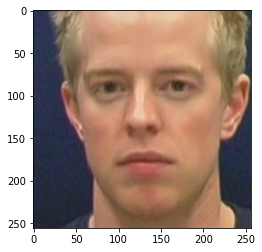

In [236]:
face_image = crop_and_align(img, left_eye, right_eye, 256, (0.35, 0.35))
plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))

In [237]:
# Implement new save_faces to address crop_and_align changes
def save_faces(path, target_path):
    i = 1
    vid = cv2.VideoCapture(path)
    while(True):
        ret, frame = vid.read()
        if not ret:
            break
        
        faces = detector.detect_faces(frame)
        face_image = crop_and_align(frame,
                                    faces[0]['keypoints']['left_eye'],
                                    faces[0]['keypoints']['right_eye'],
                                    256,
                                    (0.35,0.35)
                                   )
        
        cv2.imwrite("{}face-{:08d}.jpg".format(target_path,i), face_image)#frame[y1:y2, x1:x2])
        if cv2.waitKey(1) & 0xFF == 27:
            break
        i += 1
    
    vid.release()
    return True

In [238]:
# Extract faces from videos

out_path = "./real-faces/"
if os.path.exists(out_path):
    shutil.rmtree(out_path)
os.mkdir(out_path)
save_faces(real_videos[5], out_path)

out_path2 = "./fake-faces/"
if os.path.exists(out_path2):
    shutil.rmtree(out_path2)
os.mkdir(out_path2)
save_faces(fake_videos[0], out_path2)

True

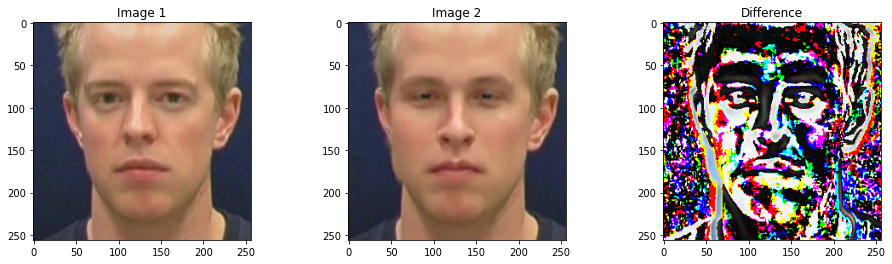

In [239]:
real_frame = out_path + 'face-00000001.jpg'
fake_frame = out_path2 + 'face-00000001.jpg'

real_image, fake_image, image_diff = diff_images(real_frame, fake_frame)